# Use the built-in sampling strategies

In this example, we will use the built-in sampling strategies provided by `f3dasm` to generate samples for a data-driven experiment.
We first create 2D continuous input domain with the `make_nd_continuous_domain()` helper function:

In [2]:
from f3dasm.design import make_nd_continuous_domain

domain = make_nd_continuous_domain(bounds=[[0.0, 1.0], [0.0, 1.0]])
domain

Domain(input_space={'x0': ContinuousParameter(lower_bound=0.0, upper_bound=1.0, log=False), 'x1': ContinuousParameter(lower_bound=0.0, upper_bound=1.0, log=False)}, output_space={})

Sampling from this domain can be done in two ways:

## Method 1: Providing a sampler name as a string:


simply call the `ExperimentData.from_sampling` method of the with the domain and the name of the sampler as a string. Some sampler require additional parameters, which can be passed as keyword arguments:

In [3]:
from f3dasm import ExperimentData, create_sampler

# Initialize the sampler
sampler = create_sampler(sampler="latin", seed=42)

# Sample from the domain
samples = ExperimentData(domain=domain)
samples = sampler.call(samples, n_samples=10)

samples

jobs     input          
               x0        x1
0  open  0.173199  0.852476
1  open  0.502058  0.215599
2  open  0.460112  0.596991
3  open  0.830424  0.718340
4  open  0.037454  0.386618
5  open  0.718182  0.159866
6  open  0.683244  0.929123
7  open  0.305808  0.095071
8  open  0.215602  0.470807
9  open  0.943195  0.621234

## Method 2: Importing the sampler from the `f3dasm.design` module

Another way is to import e.g. the `latin()` sampler from the `f3dasm.design` module and pass it to the `ExperimentData.from_sampling` method:

In [4]:
from f3dasm.design import latin

sampler = latin(seed=42)

In [5]:
# Sample from the domain
samples = ExperimentData(domain=domain)
samples = sampler.call(samples, n_samples=10)

samples

jobs     input          
               x0        x1
0  open  0.173199  0.852476
1  open  0.502058  0.215599
2  open  0.460112  0.596991
3  open  0.830424  0.718340
4  open  0.037454  0.386618
5  open  0.718182  0.159866
6  open  0.683244  0.929123
7  open  0.305808  0.095071
8  open  0.215602  0.470807
9  open  0.943195  0.621234

Text(0, 0.5, 'x1')

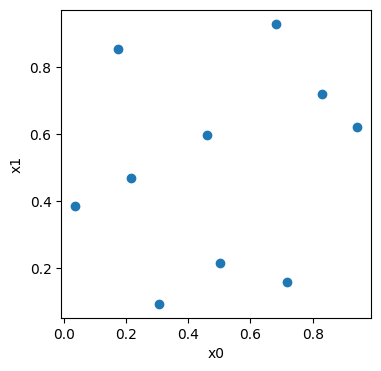

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

df_random, _ = samples.to_pandas()
ax.scatter(df_random.iloc[:, 0], df_random.iloc[:, 1])
ax.set_xlabel(domain.input_names[0])
ax.set_ylabel(domain.input_names[1])